In [43]:
from neurolib.utils import pypetUtils as pu
from petTOAD_setup import * 
import numpy as np
import my_functions as my_func
import matplotlib.pyplot as plt
import scipy.io as sio
import glob

In [120]:
def get_trajs(filename):
    trajs = pu.getTrajectorynamesInFile(f"{filename}")
    big_list = []
    for traj in trajs:
        traj_list = []
        tr = pu.loadPypetTrajectory(f"{filename}", traj)
        run_names = tr.f_get_run_names()
        n_run = len(run_names)
        ns = range(n_run)
        for i in ns:
            r = pu.getRun(i, tr)
            traj_list.append(r["BOLD"])
        big_list.append(traj_list)
    bold_arr = np.array(big_list)
    return bold_arr

def calc_mean_fc(bold_arr, model):
    if model == "disconn":
        el = 0
    elif model == "G":
        el = find_best_parms(bold_arr)
    list_fc = []
    for row in range(bold_arr.shape[0]):
        list_fc.append(my_func.fc(bold_arr[row, el, :,:]))
    arr_fc = np.array(list_fc)
    mean_fc = arr_fc.mean(axis=0)
    mean_fc_corr = my_func.matrix_correlation(mean_fc, emp_fc)
    return mean_fc, mean_fc_corr

def find_best_parms(G_arr):
    list_fc_corr = []
    for parm in range(G_arr.shape[1]):
        list_fc = []
        for row in range(G_arr.shape[0]):
            list_fc.append(my_func.fc(G_arr[row, parm, :,:]))
            arr_fc = np.array(list_fc)
            arr_fc_corr = np.array(list_fc_corr)
            mean_fc = arr_fc.mean(axis=0)
        list_fc_corr.append(my_func.matrix_correlation(mean_fc, emp_fc))
    idx = np.argmax(np.array(list_fc_corr))
    return idx

list_subj=["ADNI002S1261", "ADNI002S1280", "ADNI003S6256"]
# for subj in list_subj:
#     filename_G = f"/home/leoner/petTOAD/results/final_simulations_normal_not_log/G-weight_ws_-1.0-1.0_bs_-0.5-0.5/{subj}_homogeneous_G-weight_model.hdf"
#     filename_disconn = f"/home/leoner/petTOAD/results/final_simulations_normal_not_log/sc_disconn/{subj}_sc_disconn_model.hdf"
#     bold_arr_disconn = get_trajs(filename_disconn)
#     bold_arr_G = get_trajs(filename_G) # 4 minutes to get
#     ts = all_fMRI_clean[subj]
#     emp_fc = my_func.fc(ts)
#     mean_fc_G, mean_fc_corr_G = calc_mean_fc(bold_arr_G, "G")
#     mean_fc_disconn, mean_fc_corr_disconn = calc_mean_fc(bold_arr_disconn, "disconn")
#     fig, axs = plt.subplots(nrows=1, ncols=3, figsize = (10,5))
#     axs[0].imshow(emp_fc)
#     axs[1].imshow(mean_fc_disconn)
#     axs[2].imshow(mean_fc_G)
#     axs[0].set_title("Empirical fc")
#     axs[1].set_title(f"Disconn, sim-emp corr. = {np.round(mean_fc_corr_disconn, 2)}")
#     axs[2].set_title(f"G-weighted, sim-emp corr. = {np.round(mean_fc_corr_G, 2)}")
#     fig.suptitle(f"subject: {subj}")
#     fig.tight_layout()
#     plt.show()


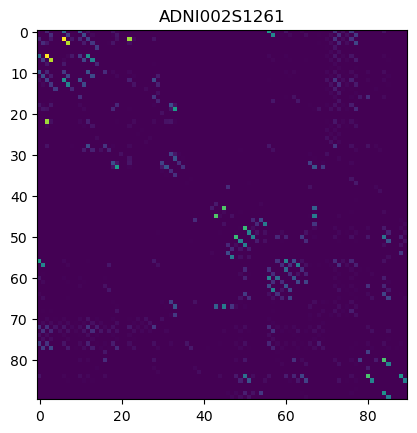

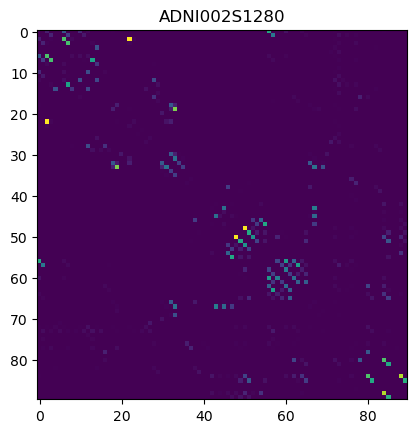

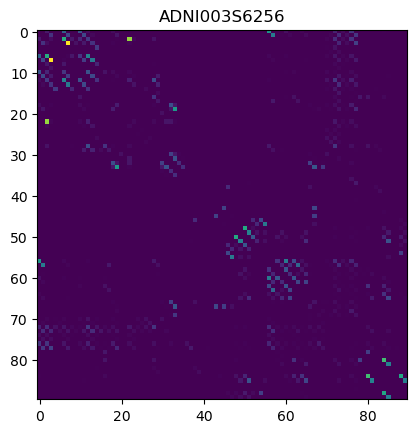

In [124]:
def get_sc_wmh_weighted(subj):
    spared_sc = pd.read_csv(LQT_DIR / f"sub-{subj}" / "pct_spared_sc_matrix.csv", index_col = 0)
    spared_sc_perc = spared_sc / 100
    return spared_sc_perc

sc = load_norm_aal_sc()

for subj in list_subj:
    perc_disconn = get_sc_wmh_weighted(subj)
    disconn_sc = np.multiply(sc, perc_disconn)
    plt.imshow(disconn_sc)
    plt.title(subj)
    plt.show()

In [4]:
import pandas as pd
G = pd.read_csv("/home/leoner/petTOAD/results/final_simulations/best_G_CN_no_WMH")["K_gl"][0]
G

1.82